                         QuantReg Regression Results                          
Dep. Variable:                profile   Pseudo R-squared:               0.1607
Model:                       QuantReg   Bandwidth:                       12.94
Method:                 Least Squares   Sparsity:                        22.44
Date:                Mon, 25 Mar 2019   No. Observations:                   25
Time:                        09:52:54   Df Residuals:                       23
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0000      2.408      4.984      0.000       7.019      16.981
plate_carol     0.4333      0.165      2.623      0.015       0.092       0.775
      q          a         b        lb        ub
0  0.05   2.000000  0.338983       NaN       NaN
1  0.15   4.000000  0.305085 

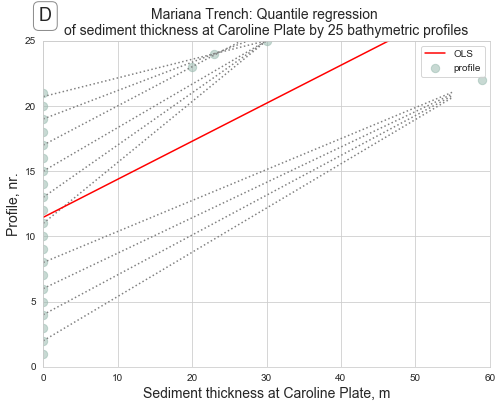

In [4]:
# Quantile regression
# Step-1. Load libraries
from __future__ import print_function
%matplotlib inline
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg
import seaborn as sns
import os
sns.set_style('whitegrid')

# Step-2. Import data
os.chdir('/Users/pauline/Documents/Python')
data = pd.read_csv("Tab-Morph.csv")

# Step-3. Least Absolute Deviation
mod = smf.quantreg('profile ~ plate_carol', data)
res = mod.fit(q=.5)
print(res.summary())

# Step-4. Placing the quantile regression results in a Pandas DataFrame, and the OLS results in a dictionary
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['plate_carol']] + \
            res.conf_int().loc['plate_carol'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('profile ~ plate_carol', data).fit()
ols_ci = ols.conf_int().loc['plate_carol'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['plate_carol'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

# Step-5. 
x = np.arange(data.plate_carol.min(), data.plate_carol.max(), 5)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.plate_carol, data.profile, alpha=.5, c='#92b5a9', s=70)
ax.set_xlim((0, 60))
ax.set_ylim((0, 25))
legend = ax.legend()
ax.set_xlabel('Sediment thickness at Caroline Plate, m', fontsize=14)
ax.set_ylabel('Profile, nr.', fontsize=14);

plt.title("Mariana Trench: Quantile regression \nof sediment thickness at Caroline Plate by 25 bathymetric profiles", fontsize=14)
plt.annotate('D', xy=(-0.01, 1.06), xycoords="axes fraction", fontsize=18,
           bbox=dict(boxstyle='round, pad=0.3', fc='w', edgecolor='grey', linewidth=1, alpha=0.9))
plt.show()